In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style = 'whitegrid')

In [2]:
df = pd.read_csv('D:/GOW/netflix_titles.csv')
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

In [5]:
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

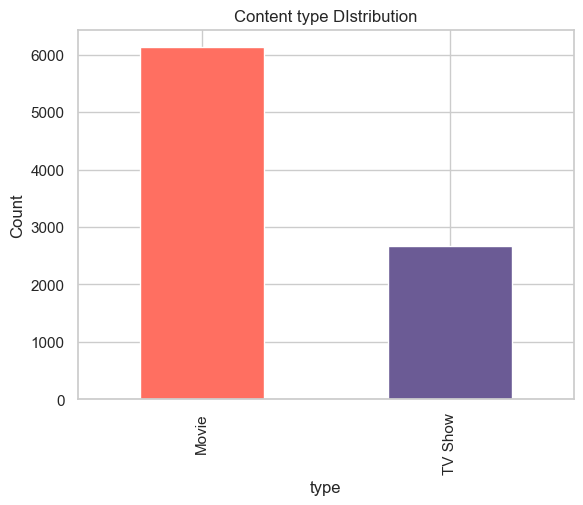

In [7]:
df['type'].value_counts().plot(kind = 'bar', color = ['#ff6f61','#6b5b95'])
plt.title("Content type DIstribution")
plt.ylabel("Count")
plt.show()

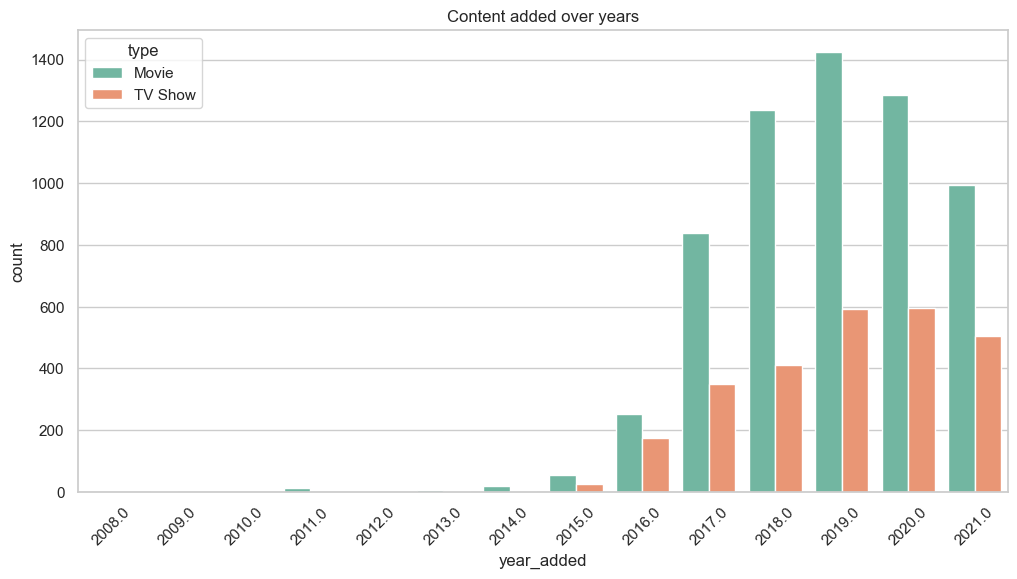

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='year_added',hue='type',palette='Set2')
plt.title("Content added over years")
plt.xticks(rotation=45)
plt.show()

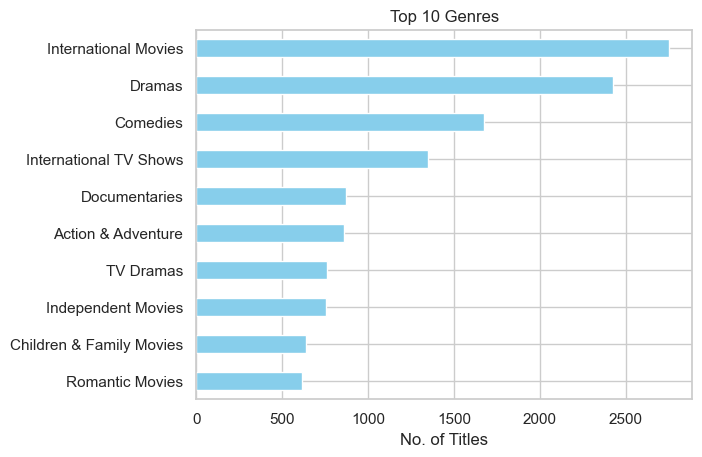

In [9]:
genres = df['listed_in'].str.split(', ',expand = True).stack().value_counts().head(10)

genres.plot(kind='barh',color='skyblue')
plt.title("Top 10 Genres")
plt.xlabel("No. of Titles")
plt.gca().invert_yaxis()
plt.show()

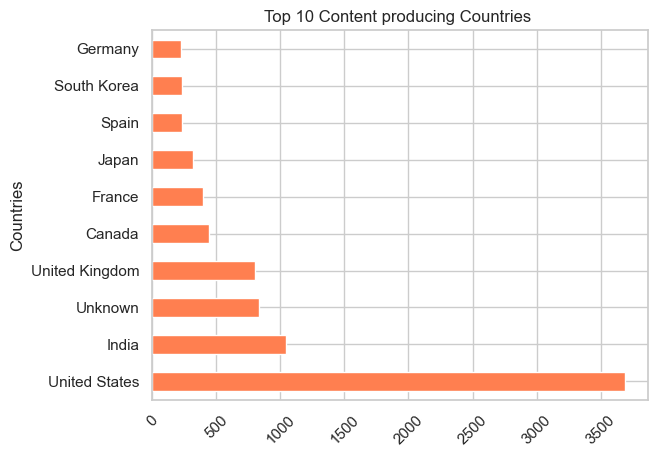

In [10]:
countries = df['country'].str.split(', ',expand = True).stack().value_counts().head(10)

countries.plot(kind='barh',color='coral')
plt.title("Top 10 Content producing Countries ")
plt.ylabel("Countries")
plt.xticks(rotation=45)
plt.show()

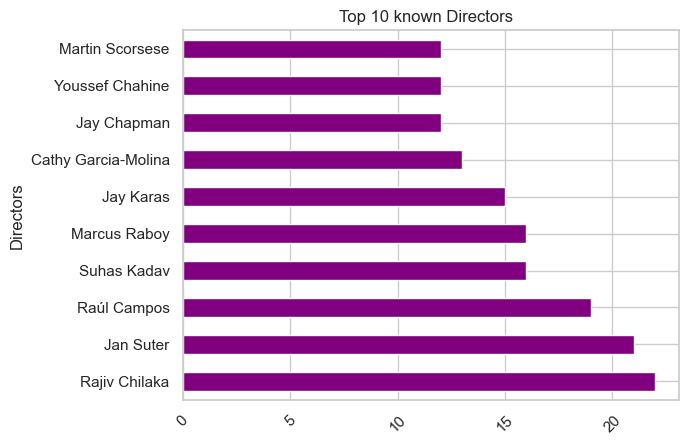

In [11]:
directors = df[df['director'].notna() & (df['director'] != 'Unknown')]

top_directors = directors['director'].str.split(', ',expand = True).stack().value_counts().head(10)
top_directors.plot(kind='barh',color='purple')
plt.title("Top 10 known Directors  ")
plt.ylabel("Directors")
plt.xticks(rotation=45)
plt.show()

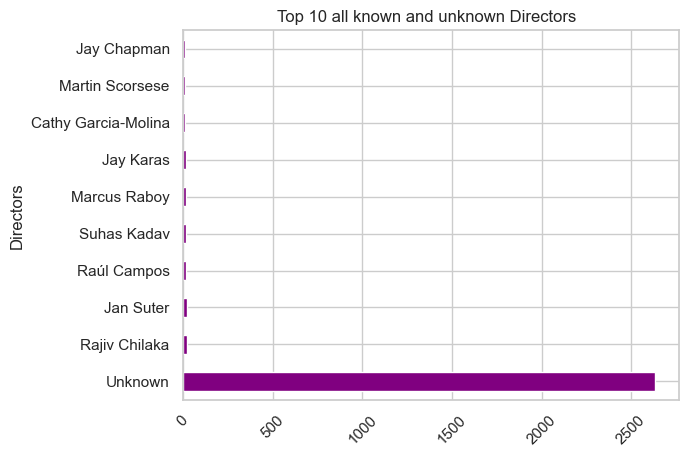

In [12]:
top_directors = df['director'].str.split(', ',expand = True).stack().value_counts().head(10)
top_directors.plot(kind='barh',color='purple')
plt.title("Top 10 all known and unknown Directors  ")
plt.ylabel("Directors")
plt.xticks(rotation=45)
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_20104\2521301053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_int'] = df_movie['duration'].str.extract('(\d+)').astype(float)


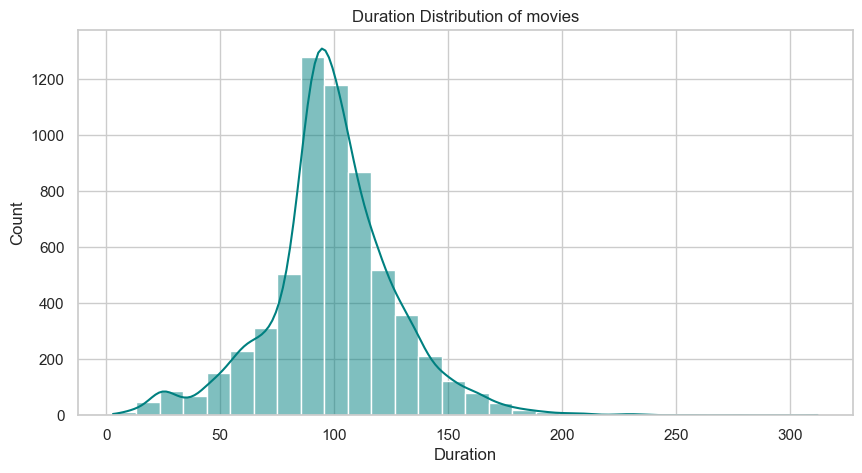

In [13]:
df_movie = df[df['type'] == 'Movie']
df_movie['duration_int'] = df_movie['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df_movie['duration_int'], bins = 30 , kde = True, color='teal')
plt.title("Duration Distribution of movies")
plt.xlabel("Duration")
plt.show()

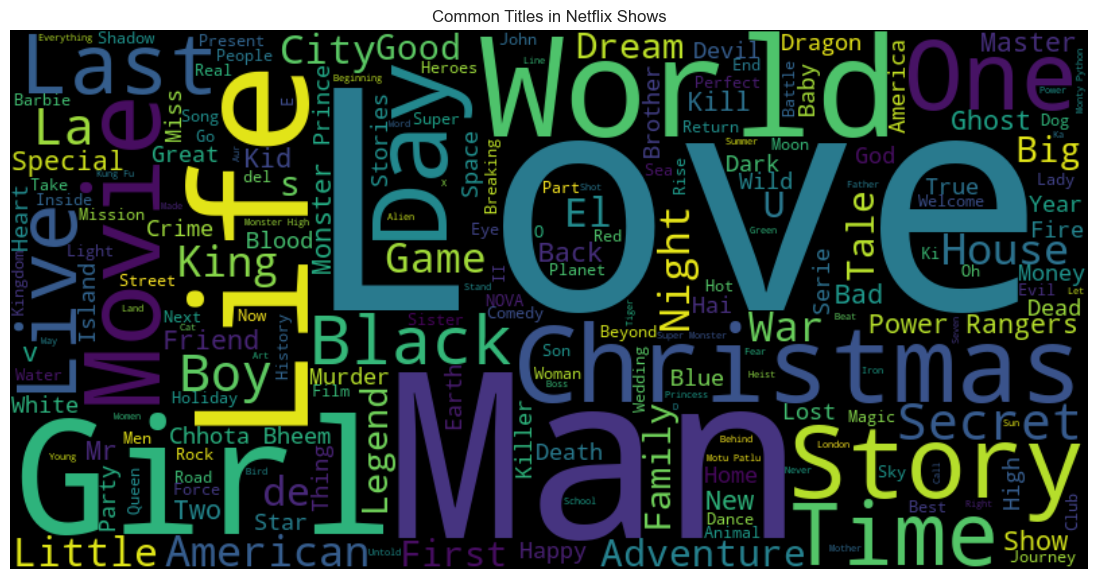

In [14]:
title_words = ' '.join(df['title'])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'black').generate(title_words)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.title("Common Titles in Netflix Shows")
plt.show()

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

df['genres'] = df['listed_in'].str.split(', ')
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

df = pd.concat([df, genre_dummies], axis=1)

In [16]:
df['main_country'] = df['country'].apply(lambda x: x.split(', ')[0])

top_countries = df['main_country'].value_counts().nlargest(10).index
df['main_country'] = df['main_country'].apply(lambda x: x if x in top_countries else 'Other')
country_dummies = pd.get_dummies(df['main_country'], prefix='country')
df = pd.concat([df, country_dummies], axis=1)


In [17]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country_France,country_India,country_Japan,country_Mexico,country_Other,country_South Korea,country_Spain,country_United Kingdom,country_United States,country_Unknown
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,False,False,False,False,False,False,False,False,True,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,False,False,False,False,True,False,False,False,False,False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,False,False,False,False,False,False,False,False,False,True
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,...,False,False,False,False,False,False,False,False,False,True
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,False,False,False,False,False,False,False,False,True,False
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,...,False,False,False,False,False,False,False,False,False,True
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,False,False,False,False,False,False,False,False,True,False
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,False,False,False,False,False,False,False,False,True,False


In [20]:
df['release_year'] = df['release_year'].astype(int)
df['year_added'] = df['year_added'].fillna(0).astype(int)


In [21]:
df['is_popular'] = 0
df.loc[
    (df['director'] != 'Unknown') &
    (df['cast'] != 'Unknown') &
    (df['main_country'].isin(top_countries)),
    'is_popular'
] = 1


In [22]:
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country_India,country_Japan,country_Mexico,country_Other,country_South Korea,country_Spain,country_United Kingdom,country_United States,country_Unknown,is_popular
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,False,False,False,False,False,False,False,True,False,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,False,False,False,True,False,False,False,False,False,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,False,False,False,False,False,False,False,False,True,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,...,False,False,False,False,False,False,False,False,True,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,True,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,False,False,False,False,False,False,False,True,False,1
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,...,False,False,False,False,False,False,False,False,True,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,False,False,False,False,False,False,False,True,False,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,False,False,False,False,False,False,False,True,False,1


In [23]:
df_model = df.drop(columns=['show_id', 'title', 'description', 'date_added',
                            'listed_in', 'genres', 'country', 'main_country', 'cast', 'director', 'duration'])


In [49]:
df_model.head()


,type,release_year,rating,year_added,month_added,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,...,country_India,country_Japan,country_Mexico,country_Other,country_South Korea,country_Spain,country_United Kingdom,country_United States,country_Unknown,is_popular
0,Movie,2020,PG-13,2021,9.0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
1,TV Show,2021,TV-MA,2021,9.0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
2,TV Show,2021,TV-MA,2021,9.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,1
3,TV Show,2021,TV-MA,2021,9.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,0
4,TV Show,2021,TV-MA,2021,9.0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,0


In [29]:
# time for ML

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix

In [50]:
df_ml = df.drop(columns=[
    'show_id', 'title', 'description', 'date_added', 'listed_in',
    'genres', 'country', 'main_country', 'cast', 'director', 'duration'
])

X = df_ml.drop('is_popular',axis = 1)
y = df_ml['is_popular']


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)

In [40]:
X_train


,type,release_year,rating,year_added,month_added,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,...,country_India,country_Japan,country_Mexico,country_Other,country_South Korea,country_Spain,country_United Kingdom,country_United States,country_Unknown,is_popular
383,Movie,2012,TV-MA,2021,7.0,1,0,0,0,0,...,True,False,False,False,False,False,False,False,False,1
70,TV Show,2021,TV-MA,2021,9.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,0
5559,Movie,2017,TV-MA,2017,3.0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
1382,Movie,2019,TV-PG,2021,1.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,1
8382,Movie,2016,TV-MA,2017,1.0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5381,TV Show,2017,TV-14,2017,7.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
4409,TV Show,2017,TV-MA,2018,11.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0
174,Movie,2003,R,2021,9.0,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
2419,Movie,2014,PG-13,2020,6.0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1


In [41]:
X_test

,type,release_year,rating,year_added,month_added,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,...,country_India,country_Japan,country_Mexico,country_Other,country_South Korea,country_Spain,country_United Kingdom,country_United States,country_Unknown,is_popular
3303,Movie,2019,TV-G,2019,11.0,0,0,0,0,1,...,False,False,False,True,False,False,False,False,False,0
4212,Movie,2018,TV-14,2019,1.0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
4660,Movie,2014,TV-14,2018,9.0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,1
861,Movie,2021,TV-Y7,2021,5.0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,1
7240,Movie,2010,TV-Y7,2018,8.0,0,0,0,0,1,...,False,False,True,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Movie,1991,R,2021,9.0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
4519,Movie,2018,R,2018,10.0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
5998,Movie,2018,TV-14,2018,12.0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,1
5034,Movie,2018,TV-MA,2018,2.0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0


In [59]:
X.select_dtypes(include='object').columns
X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')

X = X.dropna()
y = y.loc[X.index] 


In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00      1227

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



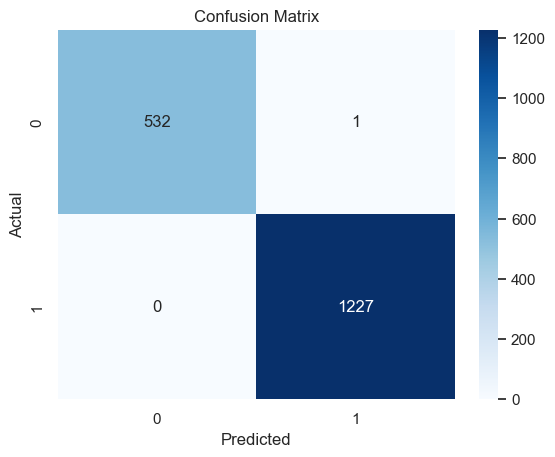

In [62]:
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
print(y.value_counts(normalize=True)) 

is_movie
1    0.696942
0    0.303058
Name: proportion, dtype: float64


In [66]:
# 1. Check for target leakage
print(X.corrwith(y).sort_values(ascending=False).head(10))

# 2. Check class balance
print(y.value_counts())

# 3. Try a baseline model like logistic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

is_popular                  0.595656
International Movies        0.444929
Dramas                      0.407033
Comedies                    0.319676
Documentaries               0.218319
Action & Adventure          0.216923
rating_R                    0.206702
Independent Movies          0.202195
Children & Family Movies    0.184865
Romantic Movies             0.180947
dtype: float64
is_movie
1    6131
0    2666
Name: count, dtype: int64
Logistic Regression Accuracy: 1.0


In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validated accuracy: {scores.mean():.4f}")

Cross-validated accuracy: 0.9995


In [68]:
from sklearn.metrics import roc_auc_score
print("AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


AUC Score: 1.0


In [69]:
df.to_csv('D:/GOW/processed_netflix_data.csv', index=False)
df_model.to_csv('D:/GOW/netflix_ml_ready.csv', index=False)